In this notebook I am going to compare the intersection of predicted HLA binders of different alleles

In [2]:
%matplotlib inline

import os
from tqdm import tqdm, tqdm_notebook
from tqdm import trange
from scipy import stats

import pandas as pd
import numpy as np
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt

import itertools

In [4]:
file_list = ["output/HLA-A02:11_NMP_9mer_proc.txt",
             "output/HLA-A30:01_NMP_9mer_proc.txt",
             "output/HLA-A24:03_NMP_9mer_proc.txt",
             "output/HLA-B15:03_NMP_9mer_proc.txt"]
comb = itertools.combinations(file_list, 2)
print(list(comb))

[('output/HLA-A02:11_NMP_9mer_proc.txt', 'output/HLA-A30:01_NMP_9mer_proc.txt'), ('output/HLA-A02:11_NMP_9mer_proc.txt', 'output/HLA-A24:03_NMP_9mer_proc.txt'), ('output/HLA-A02:11_NMP_9mer_proc.txt', 'output/HLA-B15:03_NMP_9mer_proc.txt'), ('output/HLA-A30:01_NMP_9mer_proc.txt', 'output/HLA-A24:03_NMP_9mer_proc.txt'), ('output/HLA-A30:01_NMP_9mer_proc.txt', 'output/HLA-B15:03_NMP_9mer_proc.txt'), ('output/HLA-A24:03_NMP_9mer_proc.txt', 'output/HLA-B15:03_NMP_9mer_proc.txt')]


In [7]:
df1 = pd.read_csv("output/HLA-B15:03_NMP_9mer_proc.txt", sep=' ')
df2 = pd.read_csv("output/HLA-A24:03_NMP_9mer_proc.txt", sep=' ')
df.head()

,HLA,Peptide,Aff(nM)
0,HLA-B*15:03,AAIAPFQGR,13353.7
1,HLA-B*15:03,AAIAPFQSA,488.6
2,HLA-B*15:03,AAIAPGEGD,30097.3
3,HLA-B*15:03,AAIAPIIAA,848.6
4,HLA-B*15:03,AAIAPKDDL,6584.0


In [9]:
"""
pd.Series(list(set(s1).intersection(set(s2))))
"""
df1b = df1[df1['Aff(nM)']<=500]
df2b = df2[df2['Aff(nM)']<=500]
df1bs = set(df1b.Peptide)
df2bs = set(df2b.Peptide)
inter = pd.Series(list(df1bs.intersection(df2bs)))
len(inter), inter.head()

(74936, 0    AVAVWYFPF
 1    GFWITDQLF
 2    FSPVPSSTF
 3    MTLYAAFCF
 4    CMSKFTVLF
 dtype: object)

In [7]:
file_list = []
for name in os.listdir("output/"):
    if "NMP" in name:
        file_list.append(name)
for i, s in enumerate(file_list):
    file_list[i] = s.replace("_NMP_9mer_proc.txt", "")
file_list.sort()

In [8]:
file_dict = {}
for file in tqdm_notebook(file_list):
    df = pd.read_csv("output/" + file + "_NMP_9mer_proc.txt", sep=" ")
    dfb = df[df['Aff(nM)']<=500]
    dfp = dfb.Peptide
    file_dict[file] = dfp

In [9]:
df = pd.DataFrame(index=file_list, columns=file_list)
for file1, file2 in tqdm_notebook(itertools.combinations(file_list, 2)):
    inter = np.intersect1d(file_dict[file1], file_dict[file2])
#     inter = pd.Series(list(set(file_dict[file1]).intersection(set(file_dict[file2]))))
    df.loc[file1, file2] = inter.size

In [1]:
df.to_csv("output/intersections.csv")

NameError: name 'df' is not defined

In [52]:
df1 = df
df1[df.isnull()] = 0
df1.iloc[1:5,1:5]

,HLA-A02:01,HLA-A02:02,HLA-A02:03,HLA-A02:05
HLA-A02:01,0,325433,297791,273239
HLA-A02:02,0,0,420181,366204
HLA-A02:03,0,0,0,340426
HLA-A02:05,0,0,0,0


In [87]:
df2 = pd.read_csv("output/intersections.csv")
df3 = df2['Unnamed: 0']
df2 = df2.drop("Unnamed: 0", axis=1)
df2.index = df3
# df2 = df2.drop("Unnamed: 0", axis=0)
del df2.index.name
df2 = df2.fillna(0)
df2.iloc[1:5,1:5]

,HLA-A02:01,HLA-A02:02,HLA-A02:03,HLA-A02:05
HLA-A02:01,0.0,325433.0,297791.0,273239.0
HLA-A02:02,0.0,0.0,420181.0,366204.0
HLA-A02:03,0.0,0.0,0.0,340426.0
HLA-A02:05,0.0,0.0,0.0,0.0


In [6]:
df2.shape

(82, 82)

In [21]:
df1 = df.fillna(0)
df_add = df1.add(df1.T, fill_value=0)
# df_add.head()

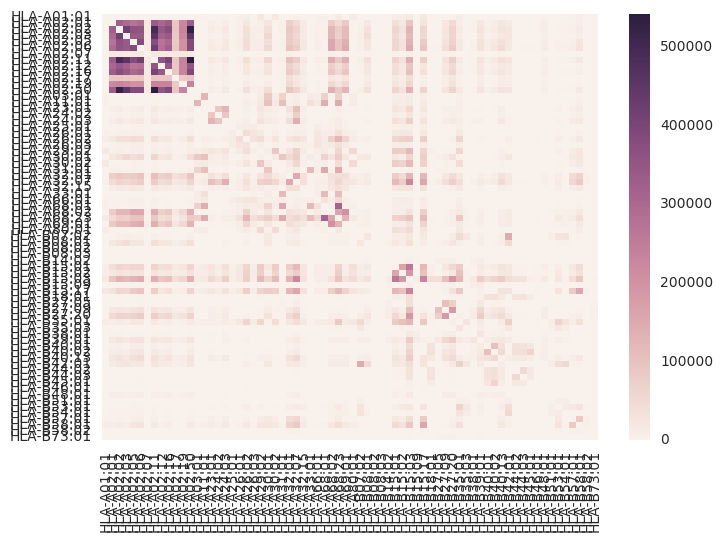

In [22]:
g = sns.heatmap(df_add.iloc[0:70, 0:70].T)

In [26]:
df2.transpose().iloc[1:5,1:5]

,HLA-A02:01,HLA-A02:02,HLA-A02:03,HLA-A02:05
HLA-A02:01,0.0,0.0,0.0,0.0
HLA-A02:02,325433.0,0.0,0.0,0.0
HLA-A02:03,297791.0,420181.0,0.0,0.0
HLA-A02:05,273239.0,366204.0,340426.0,0.0


In [38]:
for col in df2:
    if len(df2[col].unique()) == 1:
        print(df2[col].name, end=" ")

HLA-A01:01 

In [3]:
data = pd.read_csv("data/mhc_seq_imghtla.csv")
data.head()

,mhc,sequence,pseudo
0,HLAA0201,SHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRMEP...,YFAMYGEKVAHTHVDTLYYRYHYYTWAVLAYTWY
1,HLAA0211,SHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRMEP...,YFAMYGEKVAHIDVDTLYYRYHYYTWAVLAYTWY
2,HLAA2402,SHSMRYFSTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRMEP...,YSAMYEEKVAHTDENIAYYMFHYYTWAVQAYTGY
3,HLAA8001,SHSMRYFFTSVSRPGRGEPRFIAVGYVDDSQFVQFDSDAASQRMEP...,YFAMYEENVAHTNANTLYYIYRDYTWARLAYEGY
4,HLAA3001,SHSMRYFSTSVSRPGSGEPRFIAVGYVDDTQFVRFDSDAASQRMEP...,YSAMYQENVAQTDVDTLYYIYEHYTWAWLAYTWY


In [6]:
data.describe()

,mhc,sequence,pseudo
count,103,103,103
unique,103,103,100
top,HLAB4013,SHSMRYFYTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRMEP...,YYSEYRNICTNTDESNLYYWYNFYTWAELAYTWH
freq,1,1,2


In [64]:
from Levenshtein import hamming
def ham_dist_dict(data, dist, line_n):
    df_chunks = []
    for i, s_line in enumerate(data['pseudo']):
        result = hamming(data['pseudo'].iloc[line_n], s_line)
        if result <= dist:
            dict_ = {"mhc1" : data['mhc'].iloc[line_n], "mhc2" : data['mhc'].iloc[i], "dist": result}
            df_chunks.append(pd.DataFrame(dict_, index=[0]))
    df_ = pd.concat(df_chunks)
    return df_

In [35]:
mhc_list = [i.replace(':','') for i in file_list]
mhc_list = [i.replace('-','') for i in mhc_list]
mhc_list[10]

'HLAA0217'

In [43]:
d = data[data['mhc'].isin(mhc_list)]
d.index = range(d.shape[0])

In [68]:
df_chunks = []
for i in tqdm_notebook(d.index):
    df_ = ham_dist_dict(d, dist=100, line_n=i)
    df_chunks.append(df_)
mhc_dist = pd.concat(df_chunks)
mhc_dist.index = range(len(mhc_dist))
mhc_dist.head()

,dist,mhc1,mhc2
0,0,HLAA0201,HLAA0201
1,2,HLAA0201,HLAA0211
2,11,HLAA0201,HLAA2402
3,11,HLAA0201,HLAA8001
4,9,HLAA0201,HLAA3001


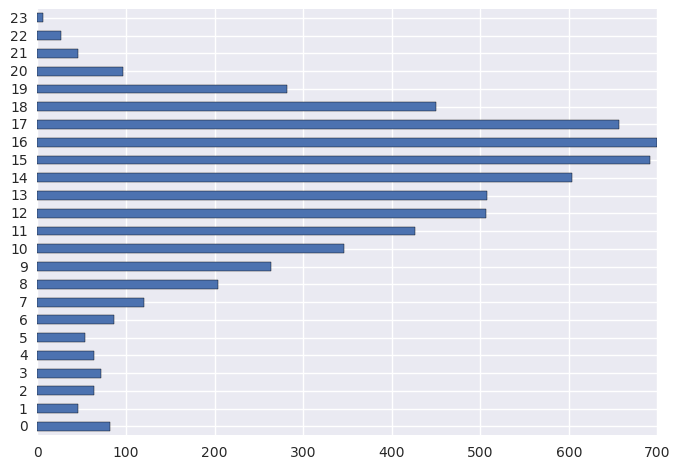

In [85]:
mhc_dist.dist.value_counts().sort_index().plot.barh()

In [ ]:
mhc_dist.mhc1 = mhc_dist.mhc1.apply(lambda x: x[0:3]+'-'+x[3:6]+':'+x[6:len(x)])

In [101]:
mhc_dist.mhc2 = mhc_dist.mhc2.apply(lambda x: x[0:3]+'-'+x[3:6]+':'+x[6:len(x)])
mhc_dist.head()

,dist,mhc1,mhc2
0,0,HLA-A02:01,HLA-A02:01
1,2,HLA-A02:01,HLA-A02:11
2,11,HLA-A02:01,HLA-A24:02
3,11,HLA-A02:01,HLA-A80:01
4,9,HLA-A02:01,HLA-A30:01


In [ ]:
mhc_df1 = pd.DataFrame(index=file_list, columns=file_list)
for file1, file2 in tqdm_notebook(itertools.combinations(file_list, 2)):
    df.loc[file1, file2] = inter.size

In [114]:
not any(df2.index.isin(mhc_dist.mhc1))

SyntaxError: positional argument follows keyword argument (<ipython-input-114-6dbe12c8677c>, line 1)